# COVID-19 BLOOD PREDICTION

### Import libraries:

In [ ]:

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

import seaborn as sns
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data.dataset import Dataset
import matplotlib.pyplot as plt

In [ ]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 83 kB/s 


### Get data

In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
transform_dict = {'PBS': 1, 'N-protein': 0, 'Blood healthy': 1, 'N-protein high conc': 0, 'Blood ill': 0}
predict_dict = {1: 'Healthy', 0: 'Ill'}

In [ ]:
train.head()

0.02       0.1      0.5         1        5       5n compound
0 -0.050848 -0.451232 -7.51434  -0.00111 -0.02792 -0.02555      PBS
1 -0.110977 -0.438037 -5.26861 -54.47720 -0.01301 -0.01842      PBS
2 -0.010073 -0.425015 -4.37171 -34.92990 -0.00951 -0.01851      PBS
3 -0.150482 -0.412165 -3.80492 -23.95760 -0.00981 -0.01880      PBS
4 -0.110232 -0.399486 -3.39362 -17.42290 -0.01027 -0.01903      PBS

In [ ]:
np.unique(train['compound'])

array(['N-protein', 'N-protein high conc', 'PBS'], dtype=object)

In [ ]:
np.unique(test['compound'])

array(['Blood healthy', 'Blood ill'], dtype=object)

In [ ]:
X_train = train.drop(['compound'], axis=1)
y_train = train['compound']

X_test = test.drop(['compound'], axis=1)
y_test = test['compound']

In [ ]:
y_train = np.array(y_train).tolist()
y_test = np.array(y_test).tolist()

y_train_new = []
y_test_new = []

for i in range(len(y_train)):
    y_train_new.append(transform_dict[y_train[i]])

for i in range(len(y_test)):
    y_test_new.append(transform_dict[y_test[i]])
    
y_train = pd.DataFrame(data={'label':y_train_new})
y_test = pd.DataFrame(data={'label': y_test_new})

y_train.head(5)

label
0      1
1      1
2      1
3      1
4      1

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X_test, y_test, test_size=0.1)

In [ ]:
print('X_train shape: ', X_train.shape)
print('X_test shape:  ', X_test.shape)
print('X_val shape:   ', X_val.shape)


X_train shape:  (5427, 6)
X_test shape:   (6030, 6)
X_val shape:    (603, 6)


array([0, 1])

### Training CatBoost:

In [ ]:
model1 = CatBoostClassifier(iterations=20000, random_state=42, depth=7,learning_rate=1e-3, use_best_model=True)

In [ ]:
model1.fit(X_train, y_train, eval_set=(X_val, y_val), verbose=500, plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 0.6921522	test: 0.6921310	best: 0.6921310 (0)	total: 60.2ms	remaining: 20m 3s
500:	learn: 0.4172645	test: 0.4163257	best: 0.4163257 (500)	total: 2.51s	remaining: 1m 37s
1000:	learn: 0.3365126	test: 0.3402908	best: 0.3402908 (1000)	total: 5.17s	remaining: 1m 38s
1500:	learn: 0.3004375	test: 0.3093424	best: 0.3093424 (1500)	total: 7.66s	remaining: 1m 34s
2000:	learn: 0.2789782	test: 0.2922203	best: 0.2922203 (2000)	total: 10.4s	remaining: 1m 33s
2500:	learn: 0.2637691	test: 0.2806469	best: 0.2806469 (2500)	total: 13.1s	remaining: 1m 31s
3000:	learn: 0.2516075	test: 0.2717556	best: 0.2717556 (3000)	total: 16.1s	remaining: 1m 31s
3500:	learn: 0.2416040	test: 0.2646402	best: 0.2646402 (3500)	total: 18.9s	remaining: 1m 29s
4000:	learn: 0.2328992	test: 0.2583979	best: 0.2583979 (4000)	total: 22.1s	remaining: 1m 28s
4500:	learn: 0.2251450	test: 0.2530789	best: 0.2530789 (4500)	total: 25.5s	remaining: 1m 27s
5000:	learn: 0.2183106	test: 0.2483197	best: 0.2483197 (5000)	total: 28.6s	re

Predicting:

In [ ]:
y_pred = model1.predict(X_test)


Precision: 0.9754
Recall: 0.9400
F1-measure: 0.9564
Accuracy: 0.9731
Roc-auc: 0.9400
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      4824
           1       0.98      0.88      0.93      1206

    accuracy                           0.97      6030
   macro avg       0.98      0.94      0.96      6030
weighted avg       0.97      0.97      0.97      6030



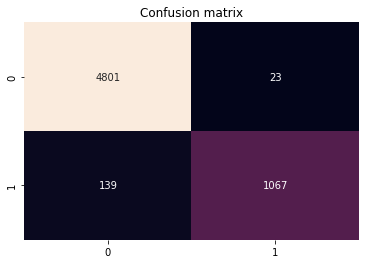

In [ ]:
print("Precision: {0:6.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.4f}".format(accuracy_score(y_test, y_pred)))
print("Roc-auc: {0:6.4f}".format(roc_auc_score(y_test, y_pred, average='macro')))
print(classification_report(y_test, y_pred))
labels = model1.classes_
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

Save model:

In [ ]:
model1.save_model('covid_model')

### Training XGBoost: 

In [ ]:
model2 = XGBClassifier(n_estimators=18000, max_depth=7, booster='gbtree', n_jobs=-1, learning_rate=1e-3)

In [ ]:
model2.fit(X=X_train, y=y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


XGBClassifier(learning_rate=0.001, max_depth=7, n_estimators=18000, n_jobs=-1)

Predicting:

In [ ]:
y_pred = model2.predict(X_test)



Precision: 0.9868
Recall: 0.9731
F1-measure: 0.9798
Accuracy: 0.9872
Roc-auc: 0.9731
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4824
           1       0.99      0.95      0.97      1206

    accuracy                           0.99      6030
   macro avg       0.99      0.97      0.98      6030
weighted avg       0.99      0.99      0.99      6030



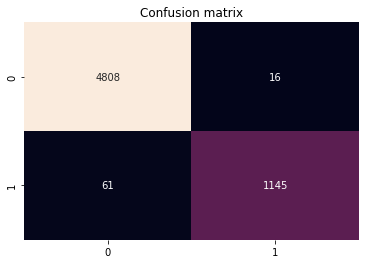

In [ ]:
print("Precision: {0:6.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.4f}".format(accuracy_score(y_test, y_pred)))
print("Roc-auc: {0:6.4f}".format(roc_auc_score(y_test, y_pred, average='macro')))
print(classification_report(y_test, y_pred))
labels = model2.classes_
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()

In [ ]:
model2.save_model('covid_xgb')

### Training LightGBM:

In [ ]:
model3 = LGBMClassifier(n_estimators=15000, num_leaves=10, max_depth=7, boosting_type='dart', learning_rate=1e-3)

In [ ]:
model3.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:98: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:133: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LGBMClassifier(boosting_type='dart', learning_rate=0.001, max_depth=7,
               n_estimators=15000, num_leaves=10)

Predicting:

In [ ]:
y_pred = model3.predict(X_test)

Precision: 0.8726
Recall: 0.8086
F1-measure: 0.8350
Accuracy: 0.9032
Roc-auc: 0.8086
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      4824
           1       0.83      0.65      0.73      1206

   micro avg       0.90      0.90      0.90      6030
   macro avg       0.87      0.81      0.83      6030
weighted avg       0.90      0.90      0.90      6030



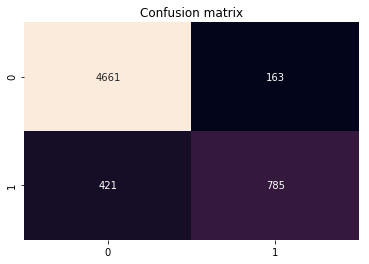

In [ ]:
print("Precision: {0:6.4f}".format(precision_score(y_test, y_pred, average='macro')))
print("Recall: {0:6.4f}".format(recall_score(y_test, y_pred, average='macro')))
print("F1-measure: {0:6.4f}".format(f1_score(y_test, y_pred, average='macro')))
print("Accuracy: {0:6.4f}".format(accuracy_score(y_test, y_pred)))
print("Roc-auc: {0:6.4f}".format(roc_auc_score(y_test, y_pred, average='macro')))
print(classification_report(y_test, y_pred))
labels = model1.classes_
sns.heatmap(data=confusion_matrix(y_test, y_pred), annot=True, fmt="d", cbar=False, xticklabels=labels, yticklabels=labels)
plt.title("Confusion matrix")
plt.show()